## 1. Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## 2. Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset['Level'].values
y = dataset['Salary'].values

In [3]:
print(x)

[ 1  2  3  4  5  6  7  8  9 10]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## 3. Feature Scaling

In [5]:
x = x.reshape(len(x), 1)

In [6]:
y = y.reshape(len(y), 1)

In [7]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [8]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [9]:
x_sc = StandardScaler()
x = x_sc.fit_transform(x)

In [10]:
y_sc = StandardScaler()
y = y_sc.fit_transform(y)

## 4. Training the SVR model on the whole dataset

In [11]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(x, y)

/home/ugochukwu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## 5. Predicting a new result

In [12]:
x_sc_1 = x_sc.transform([[6]])
x_svr = svr.predict(x_sc_1)

In [13]:
print(x_svr)

[-0.36617206]


In [14]:
x_svr = x_svr.reshape(-1, 1)

In [15]:
print(x_svr)

[[-0.36617206]]


In [16]:
y_sc_1 = y_sc.inverse_transform(x_svr)
print(y_sc_1)

[[145503.10688572]]


## 6. Visualizing the SVR result

In [17]:
y_inv = y_sc.inverse_transform(y)
x_inv = x_sc.inverse_transform(x)

In [18]:
x_inv_pred = y_sc.inverse_transform(svr.predict(x).reshape(-1, 1))

In [19]:
print(x_inv_pred)

[[ 73474.15615697]
 [ 70786.94584626]
 [ 88213.00902103]
 [108254.98574956]
 [122574.52250599]
 [145503.10688572]
 [209410.23132923]
 [330606.89204569]
 [471671.95587315]
 [557821.75899897]]


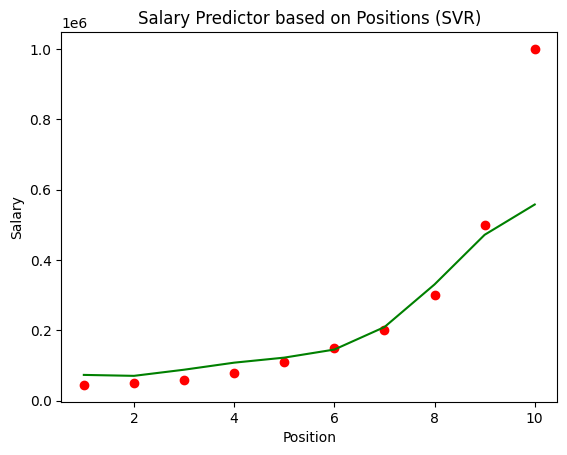

In [20]:
plt.scatter(x_inv, y_inv, color='red')
plt.plot(x_inv, x_inv_pred, color='green')
plt.title('Salary Predictor based on Positions (SVR)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

## 7. Visualing the SVR result for high resolution

In [21]:
x_grid = np.arange(min(x_inv), max(x_inv), 0.1)
x_grid = x_grid.reshape(len(x_grid), 1)
x_scaled = x_sc.transform(x_grid)
x_scaled_pred = svr.predict(x_scaled)
x_scaled_pred = x_scaled_pred.reshape(len(x_scaled_pred), 1)

In [22]:
y_sc_y = y_sc.inverse_transform(x_scaled_pred)

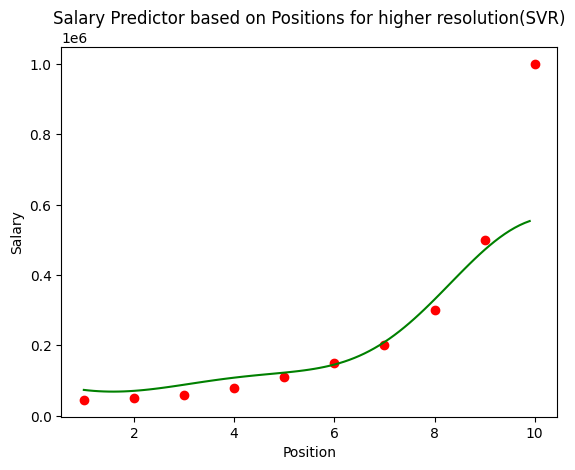

In [23]:
plt.scatter(x_inv, y_inv, color='red')
plt.plot(x_grid, y_sc_y, color='green')
plt.title('Salary Predictor based on Positions for higher resolution(SVR)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()